In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
ventes_df = pd.read_csv('C:/Users/Raux Familly/Documents/SIMPLON/Briefs/S1_141024/sources/ventes.csv')
clients_df = pd.read_csv('C:/Users/Raux Familly/Documents/SIMPLON/Briefs/S1_141024/sources/clients.csv', sep=";")
produits_df = pd.read_csv('C:/Users/Raux Familly/Documents/SIMPLON/Briefs/S1_141024/sources/produits_sous-categorie.csv')

ventes_head = ventes_df.head()
clients_head = clients_df.head()
produits_head = produits_df.head()

ventes_head


,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [4]:
clients_head

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
produits_head

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81


In [6]:
ventes_df

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2
...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8


# Détection des anomalies

In [7]:
print(clients_df.isnull().sum())
print(produits_df.isnull().sum())
print(ventes_df.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64
product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64
id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64


In [8]:
produits_df

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81
...,...,...,...,...,...
3282,2_23,Montres,Montres connectées,115.99,38
3283,0_146,Vêtements,T-shirts,17.14,55
3284,0_802,Vêtements,T-shirts,11.22,64
3285,1_140,Accessoires,Sacs à main,38.56,1


In [9]:
clients_df.describe()

,birth
count,8623.000000
mean,1977.816769
std,46.071018
min,-2001.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [10]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [11]:
clients_df['birth'] = clients_df['birth'].astype('int64')

In [12]:
clients_df.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [13]:
clients_df.describe()

,birth
count,8623.000000
mean,1977.816769
std,46.071018
min,-2001.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [14]:
produits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB


In [15]:
ventes_df.shape

(337016, 5)

In [16]:
print(produits_df.duplicated().sum())
print(clients_df.duplicated().sum())
print(ventes_df.duplicated().sum())

0
0
18


In [17]:
ventes_df_clean = ventes_df.drop_duplicates()

In [18]:
print(ventes_df_clean.duplicated().sum())

0


In [19]:
#Vérifier les prix négatifs ou anormalement bas
invalid_prices = produits_df[produits_df['price'] <= 0]
print("Prix invalides:\n", invalid_prices)

Prix invalides:
     product_id   category sub_category  price  stock_quantity
731        T_0  Vêtements     T-shirts   -1.0              89


In [21]:
#Vérifier les quantités de stock négatives ou nulles
invalid_stock = produits_df[produits_df['stock_quantity'] < 0]
print("Stock invalide:\n", invalid_stock)

Stock invalide:
 Empty DataFrame
Columns: [product_id, category, sub_category, price, stock_quantity]
Index: []


In [88]:
produits_df.nunique()

product_id        3287
category             3
sub_category         3
price             1455
stock_quantity      99
dtype: int64

In [89]:
#Vérifier que chaque vente correspond à un product_id dans produits_df
invalid_sales = ventes_df[~ventes_df['id_prod'].isin(produits_df['product_id'])]
print("Ventes avec produits inconnus : \n", invalid_sales)

Ventes avec produits inconnus : 
        id_prod                        date session_id client_id  quantity_sold
6235    0_2245  2021-06-17 03:03:12.668129    s_49705    c_1533             10
10802   0_2245  2021-06-16 05:53:01.627491    s_49323    c_7954              2
14051   0_2245  2021-11-24 17:35:59.911427   s_124474    c_5120              5
17486   0_2245  2022-02-28 18:08:49.875709   s_172304    c_4964              7
21078   0_2245  2021-03-01 00:09:29.301897        s_3     c_580             10
...        ...                         ...        ...       ...            ...
322710  0_2245  2021-04-06 19:59:19.462288    s_16936    c_4167              8
329417  0_2245  2021-03-30 23:29:02.347672    s_13738    c_7790              5
330490  0_2245  2021-12-03 14:14:40.444177   s_128815    c_6189              2
335531  0_2245  2021-04-27 18:58:47.703374    s_26624    c_1595              2
336220  0_2245  2021-05-01 03:35:03.146305    s_28235    c_5714              5

[103 rows x 5 col

In [90]:
#103 lignes dans la table ventes_df n'ont pas de correspondance id_prod avec la table produits_df['product_id']

In [92]:
#Vérifier que chaque vente associée à un client correspond à un client de la table clients 
invalid_clients = ventes_df[~ventes_df['client_id'].isin(clients_df['client_id'])]
print("Ventes avec clients inconnus : \n", invalid_clients)

Ventes avec clients inconnus : 
 Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold]
Index: []


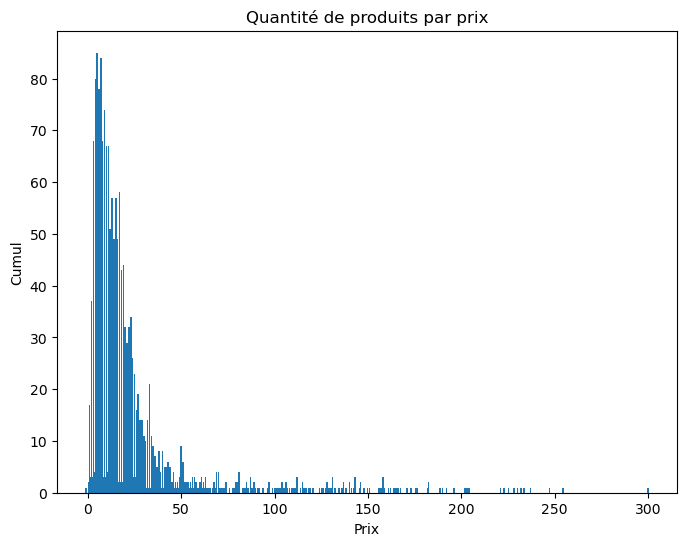

In [95]:
#Quantité de produits à un prix x
price_counts = produits_df['price'].value_counts()

#Using Patplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(price_counts.index, price_counts)
plt.title('Quantité de produits par prix')
plt.xlabel('Prix')
plt.ylabel('Cumul')
plt.show()

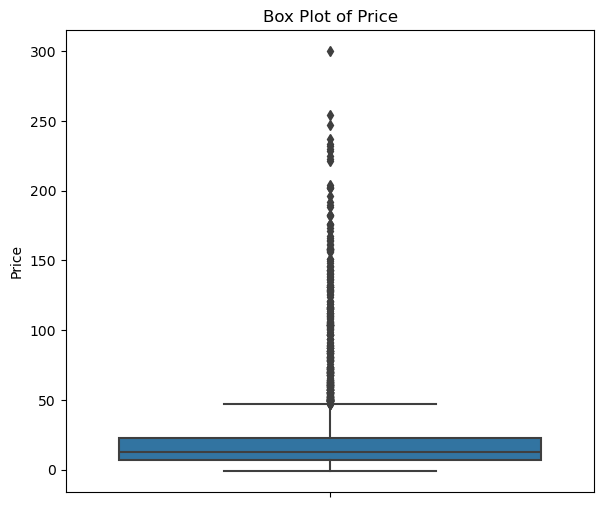

In [100]:
#box plot des prix
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=produits_df['price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [101]:
clients_df['birth'] = pd.to_numeric(clients_df['birth'], errors='coerce')

In [102]:
clients_df.describe()

,birth
count,8623.000000
mean,1977.816769
std,46.071018
min,-2001.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [104]:
clients_df['birth'] = clients_df['birth'].abs()

In [105]:
clients_df.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [113]:
produits_df['price'] = produits_df['price'].abs()
invalid_prices = produits_df[produits_df['price'] <= 0]
print("Prix invalides:\n", invalid_prices)

Prix invalides:
 Empty DataFrame
Columns: [product_id, category, sub_category, price, stock_quantity]
Index: []


In [114]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [115]:
clients_df.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [116]:
produits_df.describe()

,price,stock_quantity
count,3287.000000,3287.000000
mean,21.857250,50.309705
std,29.847462,28.847379
min,0.620000,1.000000
25%,6.990000,25.000000
50%,13.060000,51.000000
75%,22.990000,76.000000
max,300.000000,99.000000


In [118]:
produits_df.dtypes

product_id         object
category           object
sub_category       object
price             float64
stock_quantity      int64
dtype: object

## Interprétation

## Clients

In [119]:
clients_df.shape

(8623, 3)

In [120]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [121]:
clients_df.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [122]:
clients_df.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [123]:
clients_df.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

In [124]:
clients_df.duplicated().sum()

0

## Produits

In [125]:
produits_df.shape

(3287, 5)

In [126]:
produits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB


In [22]:
produits_df.describe()

,price,stock_quantity
count,3287.000000,3287.000000
mean,21.856641,50.309705
std,29.847908,28.847379
min,-1.000000,1.000000
25%,6.990000,25.000000
50%,13.060000,51.000000
75%,22.990000,76.000000
max,300.000000,99.000000


Je constate ici qu'il y a un prix négatif qu'il faudra corriger

In [31]:
produits_df['price'] = produits_df['price'].abs()

In [32]:
produits_df.describe()

,price,stock_quantity
count,3287.000000,3287.000000
mean,21.857250,50.309705
std,29.847462,28.847379
min,0.620000,1.000000
25%,6.990000,25.000000
50%,13.060000,51.000000
75%,22.990000,76.000000
max,300.000000,99.000000


In [23]:
produits_df.duplicated().sum()

np.int64(0)

In [24]:
produits_df.isnull().sum()

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

## Ventes

In [25]:
ventes_df.shape

(337016, 5)

In [26]:
ventes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_prod        337016 non-null  object
 1   date           337016 non-null  object
 2   session_id     337016 non-null  object
 3   client_id      337016 non-null  object
 4   quantity_sold  337016 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


In [27]:
ventes_df.describe()

,quantity_sold
count,337016.000000
mean,5.498522
std,2.874598
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


In [28]:
ventes_df.isnull().sum()

id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64

In [29]:
ventes_df.duplicated().sum()

np.int64(18)

Il y a 18 doublons dans la table ventes qu'il faudra supprimer

In [30]:
ventes_df_clean.duplicated().sum()

np.int64(0)

Les modifications ont été apportées concernant les doublons nous avons maintenant une table propre sans doublons

# Merge des tables

In [46]:
first_merge = ventes_df.merge(produits_df, left_on='id_prod', right_on='product_id', how='left')

In [40]:
first_merge.head()

,id_prod,date,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,0_1483,Vêtements,T-shirts,4.99,48.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,2_226,Montres,Montres connectées,65.75,63.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,1_374,Accessoires,Sacs à main,10.71,97.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,0_2186,Vêtements,T-shirts,4.20,57.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,0_1351,Vêtements,T-shirts,8.99,59.0


In [41]:
final_merge = first_merge.merge(clients_df, on='client_id', how='left')

In [42]:
final_merge.head()

,id_prod,date,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,0_1483,Vêtements,T-shirts,4.99,48.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,2_226,Montres,Montres connectées,65.75,63.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,1_374,Accessoires,Sacs à main,10.71,97.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,0_2186,Vêtements,T-shirts,4.20,57.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,0_1351,Vêtements,T-shirts,8.99,59.0,f,1980


Nos 3 tables sont réunies en 1 seule.

In [47]:
final_merge.isnull().sum()

id_prod             0
date                0
session_id          0
client_id           0
quantity_sold       0
product_id        103
category          103
sub_category      103
price             103
stock_quantity    103
sex                 0
birth               0
dtype: int64

Nous constatons que 103 ventes n'ont pas de produits rattachés. Il faut déterminer si nous souhaitons conserver ces ventes ou les supprimer de notre df.

In [48]:
final_merge['age'] = 2024 - final_merge['birth'] 

In [49]:
final_merge.head()

,id_prod,date,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,0_1483,Vêtements,T-shirts,4.99,48.0,f,1977,47
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,2_226,Montres,Montres connectées,65.75,63.0,f,2000,24
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,1_374,Accessoires,Sacs à main,10.71,97.0,f,1979,45
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,0_2186,Vêtements,T-shirts,4.20,57.0,m,1963,61
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,0_1351,Vêtements,T-shirts,8.99,59.0,f,1980,44


In [53]:
final_merge.dtypes

id_prod            object
date               object
session_id         object
client_id          object
quantity_sold       int64
product_id         object
category           object
sub_category       object
price             float64
stock_quantity    float64
sex                object
birth               int64
age                 int64
dtype: object

In [54]:
final_merge['date'] = pd.to_datetime(final_merge['date'], errors = 'coerce')

In [55]:
final_merge.dtypes

id_prod                   object
date              datetime64[ns]
session_id                object
client_id                 object
quantity_sold              int64
product_id                object
category                  object
sub_category              object
price                    float64
stock_quantity           float64
sex                       object
birth                      int64
age                        int64
dtype: object

In [58]:
final_merge = final_merge.dropna(subset=['date'])

In [59]:
missing_day_df = final_merge[final_merge['date'].isna()]
print(missing_day_df[['id_prod','date']])

Empty DataFrame
Columns: [id_prod, date]
Index: []


In [60]:
final_merge['year'] = final_merge['date'].dt.year.astype(int)
final_merge['month'] = final_merge['date'].dt.strftime('%B')  # Full month name
final_merge['day'] = final_merge['date'].dt.day.astype(int)
final_merge['time'] = final_merge['date'].dt.strftime('%H:%M:%S')

In [61]:
final_merge.head()

,id_prod,date,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity,sex,birth,age,year,month,day,time
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,0_1483,Vêtements,T-shirts,4.99,48.0,f,1977,47,2021,April,10,18:37:28
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6,2_226,Montres,Montres connectées,65.75,63.0,f,2000,24,2022,February,3,01:55:53
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3,1_374,Accessoires,Sacs à main,10.71,97.0,f,1979,45,2021,September,23,15:13:46
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8,0_2186,Vêtements,T-shirts,4.20,57.0,m,1963,61,2021,October,17,03:27:18
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2,0_1351,Vêtements,T-shirts,8.99,59.0,f,1980,44,2021,July,17,20:34:25


In [62]:
columns = ['id_prod', 'year', 'month', 'day', 'time'] + [col for col in final_merge.columns if col not in ['id_prod', 'year', 'month', 'day', 'time']]
final_merge = final_merge[columns]

final_merge.drop(columns=['date'], inplace=True)

In [63]:
final_merge.head()

,id_prod,year,month,day,time,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity,sex,birth,age
0,0_1483,2021,April,10,18:37:28,s_18746,c_4450,5,0_1483,Vêtements,T-shirts,4.99,48.0,f,1977,47
1,2_226,2022,February,3,01:55:53,s_159142,c_277,6,2_226,Montres,Montres connectées,65.75,63.0,f,2000,24
2,1_374,2021,September,23,15:13:46,s_94290,c_4270,3,1_374,Accessoires,Sacs à main,10.71,97.0,f,1979,45
3,0_2186,2021,October,17,03:27:18,s_105936,c_4597,8,0_2186,Vêtements,T-shirts,4.20,57.0,m,1963,61
4,0_1351,2021,July,17,20:34:25,s_63642,c_1242,2,0_1351,Vêtements,T-shirts,8.99,59.0,f,1980,44


In [66]:
final_merge.isnull().sum()

id_prod             0
year                0
month               0
day                 0
time                0
session_id          0
client_id           0
quantity_sold       0
product_id        103
category          103
sub_category      103
price             103
stock_quantity    103
sex                 0
birth               0
age                 0
dtype: int64

In [68]:
final_merge = final_merge.dropna(subset=['product_id'])
print(final_merge)

       id_prod  year      month  day      time session_id client_id  \
0       0_1483  2021      April   10  18:37:28    s_18746    c_4450   
1        2_226  2022   February    3  01:55:53   s_159142     c_277   
2        1_374  2021  September   23  15:13:46    s_94290    c_4270   
3       0_2186  2021    October   17  03:27:18   s_105936    c_4597   
4       0_1351  2021       July   17  20:34:25    s_63642    c_1242   
...        ...   ...        ...  ...       ...        ...       ...   
337011   1_671  2021        May   28  12:35:46    s_40720    c_3454   
337012   0_759  2021       June   19  00:19:23    s_50568    c_6268   
337013  0_1256  2021      March   16  17:31:59     s_7219    c_4137   
337014   2_227  2021    October   30  16:50:15   s_112349       c_5   
337015  0_1417  2021       June   26  14:38:19    s_54117    c_6714   

        quantity_sold product_id     category        sub_category  price  \
0                   5     0_1483    Vêtements            T-shirts   4.9

In [69]:
final_merge.isnull().sum()

id_prod           0
year              0
month             0
day               0
time              0
session_id        0
client_id         0
quantity_sold     0
product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
sex               0
birth             0
age               0
dtype: int64

In [70]:
final_merge['stock_quantity'] = final_merge['stock_quantity'].astype('int64')

In [71]:
final_merge.dtypes

id_prod            object
year                int64
month              object
day                 int64
time               object
session_id         object
client_id          object
quantity_sold       int64
product_id         object
category           object
sub_category       object
price             float64
stock_quantity      int64
sex                object
birth               int64
age                 int64
dtype: object

In [72]:
final_merge.head()

,id_prod,year,month,day,time,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity,sex,birth,age
0,0_1483,2021,April,10,18:37:28,s_18746,c_4450,5,0_1483,Vêtements,T-shirts,4.99,48,f,1977,47
1,2_226,2022,February,3,01:55:53,s_159142,c_277,6,2_226,Montres,Montres connectées,65.75,63,f,2000,24
2,1_374,2021,September,23,15:13:46,s_94290,c_4270,3,1_374,Accessoires,Sacs à main,10.71,97,f,1979,45
3,0_2186,2021,October,17,03:27:18,s_105936,c_4597,8,0_2186,Vêtements,T-shirts,4.20,57,m,1963,61
4,0_1351,2021,July,17,20:34:25,s_63642,c_1242,2,0_1351,Vêtements,T-shirts,8.99,59,f,1980,44


In [73]:
final_merge.shape

(336713, 16)

In [75]:
final_merge.to_csv('dataset_clean.csv', index=False)
